In [2]:
url_list = []
for i in range(1,8):
    url = f"https://www.1mg.com/categories/homeopathy/homeopathy-medicines-106?filter=true&pageNumber={i}"
    url_list.append(url)
url_list

['https://www.1mg.com/categories/homeopathy/homeopathy-medicines-106?filter=true&pageNumber=1',
 'https://www.1mg.com/categories/homeopathy/homeopathy-medicines-106?filter=true&pageNumber=2',
 'https://www.1mg.com/categories/homeopathy/homeopathy-medicines-106?filter=true&pageNumber=3',
 'https://www.1mg.com/categories/homeopathy/homeopathy-medicines-106?filter=true&pageNumber=4',
 'https://www.1mg.com/categories/homeopathy/homeopathy-medicines-106?filter=true&pageNumber=5',
 'https://www.1mg.com/categories/homeopathy/homeopathy-medicines-106?filter=true&pageNumber=6',
 'https://www.1mg.com/categories/homeopathy/homeopathy-medicines-106?filter=true&pageNumber=7']

In [3]:
# Import required libraries
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd
import numpy as np
import seaborn as sns

# Initialize empty lists to store scraped data
Name = []    # List to store product names
Sizes = []   # List to store product sizes
MRPs = []    # List to store product maximum retail prices (MRPs)
Prices = []  # List to store product prices
URLs = []    # List to store product URLs

page = 1  # Initialize page number for pagination

# Loop to iterate through multiple pages of the website
while True:
    
    # Define headers for the HTTP request
    header={
        'Origin': 'https://www.1mg.com',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'
    }
    
    # Construct the URL for the current page    

    url = "https://www.1mg.com/categories/homeopathy/homeopathy-medicines-106?filter=true&pageNumber=" + str(page)
    
    # Send an HTTP GET request to the URL with the defined headers
    res = requests.get(url=url, headers=header)
    
    # Check if the page is not found (404 status)
    if res.status_code == 404:
        print("Page not found. Exiting loop.")
        break
    else:
        # Parse the HTML content of the response using BeautifulSoup
        obj = soup(res.content, 'html.parser')
        
        # Find all product boxes on the current page
        Box = obj.find_all('div', {'class': 'style__product-box___liepi'})
        
        # Loop through each product box and extract relevant information
        for i in Box:
            # Extract product name
            name = i.find('div', {'class': 'style__pro-title___2QwJy'})
            if name:
                Name.append(name.text.strip())
            else:
                Name.append(None)
            
            # Extract product size
            size = i.find('div', {'class': 'style__pack-size___2JQG7'})
            if size:
                Sizes.append(size.text.strip())
            else:
                Sizes.append(None)
            
            # Extract product MRP (maximum retail price)
            mrps = i.find('span', {'class': 'style__discount-price___25Bya'})
            if mrps:
                MRPs.append(mrps.text.replace("₹", ""))
            else:
                MRPs.append(None)
            
            # Extract product price
            price = i.find('div', {'class': 'style__price-tag___cOxYc'})
            if price:
                Prices.append(price.text.replace("₹", ""))
            else:
                Prices.append(None)
            
            # Extract product URL
            mg_url = i.find('a', {'class': 'style__product-link___UB_67'})
            if mg_url:
                b = "https://www.1mg.com" + mg_url.get('href')
                URLs.append(b)
            else:
                URLs.append(None)
          
        # Print progress information for the current page
        print(page,"page=>",end=" ")
        
    page+=1 # Move to the next page for scraping
    
    print(len(URLs),end=" ")
    print(len(Prices),end=" ")
    print(len(Sizes),end=" ")
    print(len(MRPs),end=" ")
    print(len(Name))

1 page=> 51 51 51 51 51
2 page=> 102 102 102 102 102
3 page=> 153 153 153 153 153
4 page=> 204 204 204 204 204
5 page=> 255 255 255 255 255
6 page=> 306 306 306 306 306
7 page=> 357 357 357 357 357
8 page=> 408 408 408 408 408
9 page=> 459 459 459 459 459
10 page=> 510 510 510 510 510
11 page=> 561 561 561 561 561
12 page=> 612 612 612 612 612
13 page=> 663 663 663 663 663
14 page=> 714 714 714 714 714
15 page=> 765 765 765 765 765
16 page=> 816 816 816 816 816
17 page=> 867 867 867 867 867
18 page=> 918 918 918 918 918
19 page=> 969 969 969 969 969
20 page=> 1020 1020 1020 1020 1020
21 page=> 1071 1071 1071 1071 1071
22 page=> 1122 1122 1122 1122 1122
23 page=> 1173 1173 1173 1173 1173
24 page=> 1224 1224 1224 1224 1224
25 page=> 1275 1275 1275 1275 1275
26 page=> 1326 1326 1326 1326 1326
27 page=> 1377 1377 1377 1377 1377
28 page=> 1428 1428 1428 1428 1428
29 page=> 1479 1479 1479 1479 1479
30 page=> 1530 1530 1530 1530 1530
31 page=> 1581 1581 1581 1581 1581
32 page=> 1632 1632 1632

In [5]:
box=obj.find_all('div',{'class':'style__product-box___liepi'})  #checking the soup object
box

[<div class="style__product-box___liepi"><a class="style__product-link___UB_67" href="/otc/dr.-majumder-homeo-world-bryophylum-calcinum-30ml-each-200-otc859687" rel="noopener" target="_blank"><div class="style__product-image___1F9l3"><div class=""></div></div><div class="style__timer-container___36B_j"></div><div class="style__product-description___2XaG0"><div class="style__pro-title___2QwJy">Dr. Majumder Homeo World Bryophylum Calcinum(30ml Each) 200</div><div class="style__pack-size___2JQG7">box of 1 Bottle</div></div><div class="style__product-pricing___38PRR"><div class="style__price-tag___cOxYc"><span class="style__mrp-tag___2c4qA style__large___ubU44">MRP</span>₹<span>270</span></div></div></a><div class="style__not-available___2tavW">not available</div></div>,
 <div class="style__product-box___liepi"><a class="style__product-link___UB_67" href="/otc/ldd-bioscience-latrodect-m-dilution-6-ch-otc848725" rel="noopener" target="_blank"><div class="style__product-image___1F9l3"><div c

In [6]:
data={"name":Name,"size_of_bottle":Sizes,"MRPs":MRPs,"selling_price":Prices,"1mg_url":URLs} #creating a dictionary

In [7]:
df=pd.DataFrame(data) #making a data frame

In [8]:
df.head()

,name,size_of_bottle,MRPs,selling_price,1mg_url
0,Dr. Reckeweg R89 Hair Care Drop,bottle of 30 ml Drop,310,279,https://www.1mg.com/otc/dr.-reckeweg-r89-hair-...
1,Dr. Reckeweg R41 Sexual Neurasthenia Drop,bottle of 22 ml Drop,270,229,https://www.1mg.com/otc/dr.-reckeweg-r41-sexua...
2,Medisynth Gasgan Pill,bottle of 25 gm Tablet,125,110,https://www.1mg.com/otc/medisynth-gasgan-pill-...
3,Dr Willmar Schwabe Germany Cineraria Maritima ...,bottle of 10 ml Eye Drop,175,158,https://www.1mg.com/otc/dr-willmar-schwabe-ger...
4,Dr. Reckeweg Calcarea Phosphorica Biochemic Ta...,bottle of 20 gm Biochemic Tablet,185,160,https://www.1mg.com/otc/dr.-reckeweg-calcarea-...


In [9]:
df.shape

(61659, 5)

In [10]:
df.duplicated().sum() #checking duplicated values

11710

In [11]:
df.drop_duplicates(inplace = True) #dropping dulicate values

In [12]:
df.shape #shape of dataframe

(49949, 5)

In [5]:
df.isnull().sum() #checking null values

name                 0
size_of_bottle       0
MRPs              8080
selling_price        0
1mg_url              0
dtype: int64

In [6]:
df.dropna() #dropped rows with null values

,name,size_of_bottle,MRPs,selling_price,1mg_url
0,Dr. Reckeweg R89 Hair Care Drop,bottle of 30 ml Drop,310.0,279,https://www.1mg.com/otc/dr.-reckeweg-r89-hair-...
1,Dr. Reckeweg R41 Sexual Neurasthenia Drop,bottle of 22 ml Drop,270.0,229,https://www.1mg.com/otc/dr.-reckeweg-r41-sexua...
2,Medisynth Gasgan Pill,bottle of 25 gm Tablet,125.0,110,https://www.1mg.com/otc/medisynth-gasgan-pill-...
3,Dr Willmar Schwabe Germany Cineraria Maritima ...,bottle of 10 ml Eye Drop,175.0,158,https://www.1mg.com/otc/dr-willmar-schwabe-ger...
4,Dr. Reckeweg Calcarea Phosphorica Biochemic Ta...,bottle of 20 gm Biochemic Tablet,185.0,160,https://www.1mg.com/otc/dr.-reckeweg-calcarea-...
...,...,...,...,...,...
49938,Bjain Kali Bichromicum Globules 0/21 LM,bottle of 6 gm Globules,85.0,81,https://www.1mg.com/otc/bjain-kali-bichromicum...
49941,Bjain Arnica Montana Globules 0/2 LM,bottle of 6 gm Globules,85.0,81,https://www.1mg.com/otc/bjain-arnica-montana-g...
49946,LDD Bioscience Cynadon Dactylon Dilution 6 CH,bottle of 30 ml Dilution,80.0,76,https://www.1mg.com/otc/ldd-bioscience-cynadon...
49947,Bjain Allium Cepa Globules 0/19 LM,bottle of 6 gm Globules,85.0,81,https://www.1mg.com/otc/bjain-allium-cepa-glob...


In [7]:
df = df.dropna() #saving 

In [9]:
df.shape

(41869, 5)

In [10]:
df.to_excel('medicine_name_1.xlsx',index=False)   #saving to excel files

In [42]:
# https://www.1mg.com/otc/dr.-reckeweg-r89-hair-care-drop-otc326064
print(URLs[4772])

https://www.1mg.com/otc/bakson-b47-left-abdominal-drop-otc388097


In [46]:
df[df['MRPs'].isnull()]

,name,size_of_bottle,MRPs,selling_price,1mg_url
154,Dr. Reckeweg Carbo Veg Dilution 30 CH,bottle of 11 ml Dilution,None,MRP135,https://www.1mg.com/otc/dr.-reckeweg-carbo-veg...
169,Medisynth Wartex Cream,tube of 20 gm Cream,None,MRP100,https://www.1mg.com/otc/medisynth-wartex-cream...
221,Dr. Reckeweg Arnica Mont Dilution 200 CH,bottle of 11 ml Dilution,None,MRP160,https://www.1mg.com/otc/dr.-reckeweg-arnica-mo...
330,Dr. Reckeweg Carbo Veg Dilution 200 CH,bottle of 11 ml Dilution,None,MRP160,https://www.1mg.com/otc/dr.-reckeweg-carbo-veg...
347,Dr. Reckeweg Belladonna Dilution 30 CH,bottle of 11 ml Dilution,None,MRP135,https://www.1mg.com/otc/dr.-reckeweg-belladonn...
...,...,...,...,...,...
61650,Bakson's Muira Puama Dilution 30,bottle of 30 ml Dilution,None,MRP100,https://www.1mg.com/otc/bakson-s-muira-puama-d...
61652,Bakson's Filaria Loa Dilution 30,bottle of 30 ml Dilution,None,MRP100,https://www.1mg.com/otc/bakson-s-filaria-loa-d...
61653,Dr. Majumder Homeo World Bromium(30ml Each) 6,combo pack of 3 bottles,None,MRP780,https://www.1mg.com/otc/dr.-majumder-homeo-wor...
61654,Wheezal Abrotanum 0/16 LM,bottle of 20 gm Globules,None,MRP180,https://www.1mg.com/otc/wheezal-abrotanum-0-16...


In [17]:
df.dtypes

name              object
size_of_bottle    object
MRPs              object
selling_price     object
1mg_url           object
dtype: object

In [66]:
print(URLs[462])

https://www.1mg.com/otc/dr.-reckeweg-causticum-dilution-200-ch-otc335669


In [135]:
# Import required libraries
import requests
from bs4 import BeautifulSoup as soup

# Initialize empty lists to store scraped data
name = []                # List to store medicine names
brand_names = []         # List to store brand names
key_ingredients = []     # List to store key ingredients
ratings = []             # List to store ratings
number_of_ratings = []   # List to store number of ratings
key_benefits = []        # List to store key benefits
count = 0                # Initialize count

# Loop through each URL in the dataframe
for i in df['1mg_url']:
    # Define headers for the HTTP request
    header = {
        'Origin': 'https://www.1mg.com',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'
    }
    
    # Get the HTML content of the URL
    url = i
    html = requests.get(url=i,headers=header)
    bsobj = soup(html.content,'lxml')
    
    # Extract medicine name
    medicine_name = bsobj.find('h1', class_= 'ProductTitle__product-title___3QMYH')    
    if medicine_name:        
        name.append(medicine_name.text.strip())
    elif medicine_name == None:
        name.append(None)        
    else:
        name.append(None)
    
    # Extract brand name
    brand_name = bsobj.find('div', class_="ProductTitle__manufacturer___sTfon" )
    if brand_name:        
        brand_names.append(brand_name.text.strip())
    elif brand_name == None:
        brand_names.append(None)        
    else:
        brand_names.append(None)
    
    # Extract key ingredients
    key = bsobj.find('div', class_='ProductDescription__description-content___A_qCZ')
    if key:
        if ("Indications:" in key.text) and ('Key Ingredients:' in key.text):
            start_index = key.text.find('Key Ingredients:')+len('Key Ingredients:')
            end_index = key.text.find("Indications:")
            value = key.text[start_index:end_index].strip()
            key_ingredients.append(value)
        elif ("Key Benefits:" in key.text) and ('Key Ingredients:' in key.text):
            start_index = key.text.find('Key Ingredients:')+len('Key Ingredients:')
            end_index = key.text.find("Key Benefits:")
            value = key.text[start_index:end_index].strip()
            key_ingredients.append(value)
        else: 
            key_ingredients.append(None)
    else:
        key_ingredients.append(None)
    
    # Extract ratings
    rate = bsobj.find('div', class_="RatingDisplay__ratings-container___3oUuo" )
    if rate:        
        rate_value = rate.text
        ratings.append(rate_value)
    elif rate == None:
        ratings.append(None)
    else:
        ratings.append(None)
    
    # Extract number of ratings
    num_of_rate = bsobj.find('span', class_="RatingDisplay__ratings-header___ZNj5b" )
    if num_of_rate:        
        number_of_ratings.append(num_of_rate.text.replace(' Ratings',''))
    elif num_of_rate == None:
        number_of_ratings.append(None)        
    else:
        number_of_ratings.append(None)
    
    # Extract key benefits
    key_b = bsobj.find('div',class_='ProductDescription__description-content___A_qCZ')
    if key_b:
        if ("Dosage:" in key_b.text) and ('Key Benefits:' in key_b.text):
            start_index = key_b.text.find('Key Benefits:')+len('Key Benefits:')
            end_index = key_b.text.find("Dosage:")
            value = key_b.text[start_index:end_index].strip().replace('\n','')
            key_benefits.append(value)
        elif ("Directions For Use:" in key_b.text) and ('Key Benefits:' in key_b.text):
            start_index = key_b.text.find('Key Benefits:')+len('Key Benefits:')
            end_index = key_b.text.find("Directions For Use:")
            value = key_b.text[start_index:end_index].strip().replace('\n','')
            key_benefits.append(value)
        else:
            key_benefits.append(None)
    else:
        key_benefits.append(None)
    
    count += 1
    print(count, i)  # Print the current count and URL
print(count, "end")  # Print the total count at the end

11303 https://www.1mg.com/otc/ldd-bioscience-iodium-dilution-otc843010
11304 https://www.1mg.com/otc/lord-s-l-159-recalcifying-drop-otc449176
11305 https://www.1mg.com/otc/sbl-fel-tauri-dilution-1000-ch-otc348946
11306 https://www.1mg.com/otc/radient-livkar-syrup-sugar-free-otc799057
11307 https://www.1mg.com/otc/ldd-bioscience-ipecacaunha-dilution-30-otc723737
11308 https://www.1mg.com/otc/ldd-bioscience-phosphorus-dilution-200-otc724577
11309 https://www.1mg.com/otc/ldd-bioscience-condurango-mother-tincture-q-otc779126
11310 https://www.1mg.com/otc/lord-s-cocculus-indicus-mother-tincture-q-otc738047
11311 https://www.1mg.com/otc/dr.-reckeweg-argentum-met-dilution-10m-ch-otc373002
11312 https://www.1mg.com/otc/dr.-reckeweg-ferrum-met-dilution-1000-ch-otc335301
11313 https://www.1mg.com/otc/adel-plumbum-met.-dilution-1m-otc333199
11314 https://www.1mg.com/otc/adel-capsicum-dilution-1m-otc331876
11315 https://www.1mg.com/otc/sbl-acorus-calamus-dilution-30-ch-otc350659
11316 https://www.

In [30]:
df.shape

(49949, 5)

In [ ]:
# names = []
# brand_names = []
# key_benefits = [] # Hair, Eye, cholesterol
# key_ingredients = []
# ratings = []
# number_of_ratings = []

In [141]:
demo_dict = {"name": name, "brand_names" : brand_names, "key_ingredients" : key_ingredients, "ratings" : ratings,
    "number_of_ratings" : number_of_ratings, "key_benefits" : key_benefits}

In [142]:
df2 = pd.DataFrame(demo_dict)

In [144]:
df2.head()

,name,brand_names,key_ingredients,ratings,number_of_ratings,key_benefits
0,LDD Bioscience Iodium Dilution,LDD Bioscience Pvt Ltd,Iodium,None,None,Helps in maintaining a healthy metabolismReduc...
1,Lord's L 159 Recalcifying Drop,Lord's Homoeopathic Laboratory Pvt Ltd,Calcium fluoratum\n\n\nCalcium phosphoricum,None,None,It is beneficial for improving the levels of c...
2,SBL Fel Tauri Dilution 1000 CH,SBL Pvt Ltd,None,4.6,25,None
3,Radient Livkar Syrup Sugar Free,Radient Pharma,Kalmegh Q\n\n\nCarica Pap. Q\n\n\nChelidonium ...,None,None,None
4,LDD Bioscience Ipecacaunha Dilution 30,LDD Bioscience Pvt Ltd,Ipecacuanha,None,None,It is suitable for amoebic dysentery with pain...


In [145]:
df2.isnull().sum()

name                    7
brand_names             7
key_ingredients      2004
ratings              8004
number_of_ratings    8004
key_benefits         3565
dtype: int64

In [147]:
df2.to_excel("table_2(12-20).xlsx", index=False)

In [11]:
#Conacting all the excel files

In [3]:
import os

In [4]:
file_path = "C:/Users/divye/Downloads/Masai/Capstone group project/Table 2/"

In [5]:
os.listdir(file_path)

['table_2(1-12).xlsx',
 'table_2(12-20).xlsx',
 'table_2(20-25).xlsx',
 'table_2(25-30).xlsx',
 'table_2(30-35).xlsx',
 'table_2(35-38).xlsx',
 'table_2(38-42).xlsx']

In [6]:
list_file = os.listdir(file_path)

In [7]:
df_2 = None
for file in list_file:
    path = file_path+file
    temp = pd.read_excel(path)
    df_2 = pd.concat([df_2,temp])
    print(df_2.shape)

(11301, 6)
(19999, 6)
(24998, 6)
(29998, 6)
(34998, 6)
(38008, 6)
(41868, 6)


In [8]:
df_2.shape

(41868, 6)

In [9]:
df_2

,name,brand_names,key_ingredients,ratings,number_of_ratings,key_benefits
0,Dr. Reckeweg R89 Hair Care Drop,Dr Reckeweg & Co,"Hypophysis, Juglans, Kalium phosphoricum, Poly...",4.3,1169,It helps enhance hair growth and strengthPurif...
1,Dr. Reckeweg R41 Sexual Neurasthenia Drop,Dr Reckeweg & Co,"Acidum phosphoricum, Agnus castus, China, Coni...",4.1,1038,Agnus castus helps relieve physical exhaustion...
2,Medisynth Gasgan Pill,Medisynth Chemicals Pvt Ltd,Carbo vegetabilisColchicum autumnaleNux vomica,4.6,109,The pills help to improve digestionIt helps to...
3,Dr Willmar Schwabe Germany Cineraria Maritima ...,Dr Willmar Schwabe India Pvt Ltd,Seneciobicolor (cineraria maritima),4.6,1234,It is an alcohol-free formulation that doesn't...
4,Dr. Reckeweg Calcarea Phosphorica Biochemic Ta...,Dr Reckeweg & Co,Calcarea Phosphorica,4.7,850,Patients who have a vulnerability to glandular...
...,...,...,...,...,...,...
3855,Bjain Kali Bichromicum Globules 0/21 LM,Bjain Pharmaceuticals Pvt Ltd,Kali Bichromicum,NaN,NaN,NaN
3856,Bjain Arnica Montana Globules 0/2 LM,Bjain Pharmaceuticals Pvt Ltd,Arnica montana,NaN,NaN,"Effective in relieving muscle, chest and joint..."
3857,LDD Bioscience Cynadon Dactylon Dilution 6 CH,LDD Bioscience Pvt Ltd,Cynadon Dactylon,NaN,NaN,It helps in reducing inflammation of the conju...
3858,Bjain Allium Cepa Globules 0/19 LM,Bjain Pharmaceuticals Pvt Ltd,Allium cepa,NaN,NaN,Helps to improve gut health by dealing with ac...


In [10]:
df_2 = df_2.reset_index(drop=True)

In [11]:
df_2

,name,brand_names,key_ingredients,ratings,number_of_ratings,key_benefits
0,Dr. Reckeweg R89 Hair Care Drop,Dr Reckeweg & Co,"Hypophysis, Juglans, Kalium phosphoricum, Poly...",4.3,1169,It helps enhance hair growth and strengthPurif...
1,Dr. Reckeweg R41 Sexual Neurasthenia Drop,Dr Reckeweg & Co,"Acidum phosphoricum, Agnus castus, China, Coni...",4.1,1038,Agnus castus helps relieve physical exhaustion...
2,Medisynth Gasgan Pill,Medisynth Chemicals Pvt Ltd,Carbo vegetabilisColchicum autumnaleNux vomica,4.6,109,The pills help to improve digestionIt helps to...
3,Dr Willmar Schwabe Germany Cineraria Maritima ...,Dr Willmar Schwabe India Pvt Ltd,Seneciobicolor (cineraria maritima),4.6,1234,It is an alcohol-free formulation that doesn't...
4,Dr. Reckeweg Calcarea Phosphorica Biochemic Ta...,Dr Reckeweg & Co,Calcarea Phosphorica,4.7,850,Patients who have a vulnerability to glandular...
...,...,...,...,...,...,...
41863,Bjain Kali Bichromicum Globules 0/21 LM,Bjain Pharmaceuticals Pvt Ltd,Kali Bichromicum,NaN,NaN,NaN
41864,Bjain Arnica Montana Globules 0/2 LM,Bjain Pharmaceuticals Pvt Ltd,Arnica montana,NaN,NaN,"Effective in relieving muscle, chest and joint..."
41865,LDD Bioscience Cynadon Dactylon Dilution 6 CH,LDD Bioscience Pvt Ltd,Cynadon Dactylon,NaN,NaN,It helps in reducing inflammation of the conju...
41866,Bjain Allium Cepa Globules 0/19 LM,Bjain Pharmaceuticals Pvt Ltd,Allium cepa,NaN,NaN,Helps to improve gut health by dealing with ac...


In [12]:
df_1 = pd.read_excel("medicine_name_1.xlsx")

In [13]:
df_1.shape

(41869, 5)

In [14]:
df_2.shape

(41868, 6)

In [41]:
# Table 1

In [15]:
df_1


,name,size_of_bottle,MRPs,selling_price,1mg_url
0,Dr. Reckeweg R89 Hair Care Drop,bottle of 30 ml Drop,310,279.0,https://www.1mg.com/otc/dr.-reckeweg-r89-hair-...
1,Dr. Reckeweg R41 Sexual Neurasthenia Drop,bottle of 22 ml Drop,270,229.0,https://www.1mg.com/otc/dr.-reckeweg-r41-sexua...
2,Medisynth Gasgan Pill,bottle of 25 gm Tablet,125,110.0,https://www.1mg.com/otc/medisynth-gasgan-pill-...
3,Dr Willmar Schwabe Germany Cineraria Maritima ...,bottle of 10 ml Eye Drop,175,158.0,https://www.1mg.com/otc/dr-willmar-schwabe-ger...
4,Dr. Reckeweg Calcarea Phosphorica Biochemic Ta...,bottle of 20 gm Biochemic Tablet,185,160.0,https://www.1mg.com/otc/dr.-reckeweg-calcarea-...
...,...,...,...,...,...
41864,Bjain Kali Bichromicum Globules 0/21 LM,bottle of 6 gm Globules,85,81.0,https://www.1mg.com/otc/bjain-kali-bichromicum...
41865,Bjain Arnica Montana Globules 0/2 LM,bottle of 6 gm Globules,85,81.0,https://www.1mg.com/otc/bjain-arnica-montana-g...
41866,LDD Bioscience Cynadon Dactylon Dilution 6 CH,bottle of 30 ml Dilution,80,76.0,https://www.1mg.com/otc/ldd-bioscience-cynadon...
41867,Bjain Allium Cepa Globules 0/19 LM,bottle of 6 gm Globules,85,81.0,https://www.1mg.com/otc/bjain-allium-cepa-glob...


In [16]:
df_1.isnull().sum()

name              0
size_of_bottle    0
MRPs              0
selling_price     0
1mg_url           0
dtype: int64

In [17]:
df_1.dtypes

name               object
size_of_bottle     object
MRPs                int64
selling_price     float64
1mg_url            object
dtype: object

In [18]:
df_1['selling_price'] = df_1['selling_price'].astype('int64')

In [19]:
df_1.dtypes

name              object
size_of_bottle    object
MRPs               int64
selling_price      int64
1mg_url           object
dtype: object

In [20]:
# def make_clickable(val):
#     # target _blank to open new window
#     return '<a target="_blank" href="{}">{}</a>'.format(val, val)

# df_1.style.format({'1mg_url': make_clickable})

In [21]:
df_1.duplicated().sum() #no duplicate values

0

In [22]:
# MRPs
df_1.agg({'MRPs':['mean', 'median']})

,MRPs
mean,200.411952
median,145.000000


In [23]:
# selling_price
df_1.agg({'selling_price':['mean', 'median']})

,selling_price
mean,179.363276
median,133.000000


In [24]:
df_1['MRPs'].min()

40

In [25]:
df_1['MRPs'].max()

56000

C:\Users\divye\AppData\Local\Temp\ipykernel_17388\1319887197.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[df_1['MRPs']<1000]['MRPs'])


<Axes: xlabel='MRPs', ylabel='Density'>

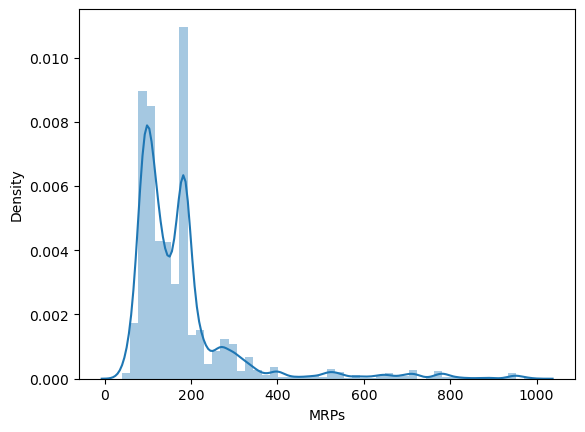

In [26]:
%matplotlib inline 
sns.distplot(df_1[df_1['MRPs']<1000]['MRPs'])

In [27]:
len(df_1['name'].unique())

34896

In [28]:
df_1.shape

(41869, 5)

In [30]:
df_1.head()

,name,size_of_bottle,MRPs,selling_price,1mg_url
0,Dr. Reckeweg R89 Hair Care Drop,bottle of 30 ml Drop,310,279,https://www.1mg.com/otc/dr.-reckeweg-r89-hair-...
1,Dr. Reckeweg R41 Sexual Neurasthenia Drop,bottle of 22 ml Drop,270,229,https://www.1mg.com/otc/dr.-reckeweg-r41-sexua...
2,Medisynth Gasgan Pill,bottle of 25 gm Tablet,125,110,https://www.1mg.com/otc/medisynth-gasgan-pill-...
3,Dr Willmar Schwabe Germany Cineraria Maritima ...,bottle of 10 ml Eye Drop,175,158,https://www.1mg.com/otc/dr-willmar-schwabe-ger...
4,Dr. Reckeweg Calcarea Phosphorica Biochemic Ta...,bottle of 20 gm Biochemic Tablet,185,160,https://www.1mg.com/otc/dr.-reckeweg-calcarea-...


In [31]:
df_1.to_excel("medicine_name_final.xlsx", index=False)

In [32]:
# table 2 data cleaning
df_2.head()

,name,brand_names,key_ingredients,ratings,number_of_ratings,key_benefits
0,Dr. Reckeweg R89 Hair Care Drop,Dr Reckeweg & Co,"Hypophysis, Juglans, Kalium phosphoricum, Poly...",4.3,1169,It helps enhance hair growth and strengthPurif...
1,Dr. Reckeweg R41 Sexual Neurasthenia Drop,Dr Reckeweg & Co,"Acidum phosphoricum, Agnus castus, China, Coni...",4.1,1038,Agnus castus helps relieve physical exhaustion...
2,Medisynth Gasgan Pill,Medisynth Chemicals Pvt Ltd,Carbo vegetabilisColchicum autumnaleNux vomica,4.6,109,The pills help to improve digestionIt helps to...
3,Dr Willmar Schwabe Germany Cineraria Maritima ...,Dr Willmar Schwabe India Pvt Ltd,Seneciobicolor (cineraria maritima),4.6,1234,It is an alcohol-free formulation that doesn't...
4,Dr. Reckeweg Calcarea Phosphorica Biochemic Ta...,Dr Reckeweg & Co,Calcarea Phosphorica,4.7,850,Patients who have a vulnerability to glandular...


In [33]:
df_2.shape

(41868, 6)

In [34]:
df_2.dtypes

name                  object
brand_names           object
key_ingredients       object
ratings              float64
number_of_ratings     object
key_benefits          object
dtype: object

In [35]:
df_2['number_of_ratings'].unique()

array(['1169', '1038', '109', '1234', '850', '662', '223', '565', '1993',
       '602', '10', '794', '612', '590', '55', '606', '939', '717', '89',
       '727', '462', '474', '30', '680', '1781', '855', '27', '563',
       '439', '986', '15', '1211', '329', nan, '392', '534', '403',
       '1008', '758', '431', '48', '324', '365', '608', '629', '1027',
       '334', '607', '499', '368', '715', '28', '748', '299', '330',
       '477', '144', '326', '543', '905', '725', '246', '279', '540',
       '1073', '880', '449', '314', '554', '262', '742', '103', '295',
       '183', '481', '379', '288', '156', '270', '143', '879', '239',
       '252', '169', '935', '267', '347', '250', '297', '522', '293',
       '592', '401', '863', '247', '163', '41', '549', '218', '351',
       '224', '287', '383', '253', '318', '286', '113', '914', '215',
       '504', '343', '309', '184', '226', '386', '271', '425', '555',
       '527', '189', '579', '272', '276', '121', '225', '191', '464',
       '170', '

In [36]:
df_2.isnull().sum()

name                    33
brand_names            123
key_ingredients       8517
ratings              33164
number_of_ratings    33164
key_benefits         17264
dtype: int64

In [37]:
df_22 = df_2.copy()

In [38]:
df_2.dtypes

name                  object
brand_names           object
key_ingredients       object
ratings              float64
number_of_ratings     object
key_benefits          object
dtype: object

In [39]:
# cleaning number_of_ratings column
df_2['number_of_ratings'] = df_2['number_of_ratings'].str.split('&').str[0].str.strip()

In [40]:
df_2['number_of_ratings'].unique()

array(['1169', '1038', '109', '1234', '850', '662', '223', '565', '1993',
       '602', '10', '794', '612', '590', '55', '606', '939', '717', '89',
       '727', '462', '474', '30', '680', '1781', '855', '27', '563',
       '439', '986', '15', '1211', '329', nan, '392', '534', '403',
       '1008', '758', '431', '48', '324', '365', '608', '629', '1027',
       '334', '607', '499', '368', '715', '28', '748', '299', '330',
       '477', '144', '326', '543', '905', '725', '246', '279', '540',
       '1073', '880', '449', '314', '554', '262', '742', '103', '295',
       '183', '481', '379', '288', '156', '270', '143', '879', '239',
       '252', '169', '935', '267', '347', '250', '297', '522', '293',
       '592', '401', '863', '247', '163', '41', '549', '218', '351',
       '224', '287', '383', '253', '318', '286', '113', '914', '215',
       '504', '343', '309', '184', '226', '386', '271', '425', '555',
       '527', '189', '579', '272', '276', '121', '225', '191', '464',
       '170', '

In [41]:
df_2[df_2['number_of_ratings']=="1761 & 5 Reviews"]

,name,brand_names,key_ingredients,ratings,number_of_ratings,key_benefits


In [42]:
df_22.loc[1514:1514+1]

,name,brand_names,key_ingredients,ratings,number_of_ratings,key_benefits
1514,Dr. Reckeweg Hair Care Combo Pack of Lycopodiu...,NaN,AlfalfaLactuca SativaLecithinumOenothera bienn...,4.3,1761 & 5 Reviews,"It helps in reducing premature hair loss, gray..."
1515,Dr. Reckeweg Drosera Dilution 200 CH,Dr Reckeweg & Co,NaN,4.9,19,Highly effective in treating gastric disorders...


In [43]:
df_2['number_of_ratings'] =pd.to_numeric(df_2['number_of_ratings'], errors='coerce').astype('Int64')

In [44]:
df_2.dtypes

name                  object
brand_names           object
key_ingredients       object
ratings              float64
number_of_ratings      Int64
key_benefits          object
dtype: object

In [45]:
df_2['ratings'].unique()

array([4.3, 4.1, 4.6, 4.7, 4.5, 4.4, 4.2, 4. , nan, 4.8, 3.9, 3.8, 3.5,
       3.4, 3.6, 3.7, 4.9, 3.3, 3.1, 2.6, 5. , 3.2, 2.5])

In [46]:
df_2.isnull().sum()

name                    33
brand_names            123
key_ingredients       8517
ratings              33164
number_of_ratings    36732
key_benefits         17264
dtype: int64

In [47]:
# dropping the rows where name is null
df_2.dropna(subset = ['name'],inplace = True)

In [48]:
df_2.isnull().sum()

name                     0
brand_names             90
key_ingredients       8484
ratings              33131
number_of_ratings    36699
key_benefits         17231
dtype: int64

In [49]:
df_2.shape

(41835, 6)

In [50]:
df_2["brand_names"].unique()

array(['Dr Reckeweg & Co', 'Medisynth Chemicals Pvt Ltd',
       'Dr Willmar Schwabe India Pvt Ltd',
       'Bjain Pharmaceuticals Pvt Ltd', "Bakson's Homeopathy",
       'SBL Pvt Ltd', 'Bhargava Phytolab', 'Adel Pekana Germany',
       'Allen Homoeo & Herbal Products Ltd', 'HAPDCO',
       'Wheezal Homeo Pharma', 'New Life Laboratories Pvt Ltd', 'HASLAB',
       'Bangalore Bio-Plasgens', "Lord's Homoeopathic Laboratory Pvt Ltd",
       'Bio-India Pharma Pvt Ltd', 'Similia Homoeo Laboratory',
       'LDD Bioscience Pvt Ltd', 'Adven Biotech Pvt Ltd',
       'Rxhomeo Private Limited', 'Renovision Exports Pvt Ltd',
       'N.P. Dutt & Son', 'German Homoeo Care and Cure Pvt. Ltd.',
       'Allen Healthcare', 'Sarada Homoeo Laboratory',
       'Bhandari Homoeopathic Laboratories', 'St. George’s Homoeopathy',
       'Ralson Remedies Pvt Ltd', 'Bio Home Pharmacy',
       'Dr. Raj Homoeo Pharmacy', 'MM Traders',
       'Nanak Laboratories Pvt Ltd', nan, 'Bioforce',
       'Dr Batra Positive He

In [206]:
df_2["brand_names"].nunique()

84

In [52]:
# droping the brand name with null values
df_2.dropna(subset = ['brand_names'],inplace = True)

In [53]:
df_2.isnull().sum()

name                     0
brand_names              0
key_ingredients       8473
ratings              33131
number_of_ratings    36686
key_benefits         17213
dtype: int64

In [54]:
df_2.shape

(41745, 6)

In [189]:
list(df_2['key_ingredients'].unique())

['Hypophysis, Juglans, Kalium phosphoricum, Polysorbatum, Testes',
 'Acidum phosphoricum, Agnus castus, China, Conium, Damiana, Phosphorus, Sepia',
 'Carbo vegetabilisColchicum autumnaleNux vomica',
 'Seneciobicolor (cineraria maritima)',
 'Calcarea Phosphorica',
 'Berberis Vulgaris',
 'Guatteria Gaumeri',
 'Ferrum Phos. 3x, Natrum Mur. 6x, Kali Sulph. 3x, Kali Mur. 3x, Baptisia Tinc. 4x, Bryonia Alba 4x, Causticum 6x, Eucalyptus Gl. 3x, Gelsemium Sep. 6x, Sabadilla 6x, Eupatorium Perf. 3x',
 'Nux Vomica',
 'Acidum sulfuricum, Argentum, Arnica, Bryonia, Causticum Hahnemann, Ledum',
 'Skookum chuckChoralumDolic pruriens-mucunaFagopyrum esculentumMezereum',
 'Berberis vulgaris Q, Sarsaparilla Q, Ocimum canum Q, Solidago virgaurea Q, Pareira brava Q, Senecio aureus Q',
 'SennaSulphur',
 'Acidum nitricum, Aesculus, Collinsonia canadensis, Hamamelis, Kalium carbonicum',
 nan,
 'Damiana Ø1x 10%, Ginseng Ø1x: 10%, Agnus castus 2x: 10%, Nuphar luteum 2x: 10%, Muira puama Ø1x: 10%',
 'Cuprum me

In [56]:
df_2['key_ingredients'].nunique()

5882

In [191]:
df_2['key_ingredients'] = df_2['key_ingredients'].str.replace('\n','')

In [192]:
df_2['key_ingredients'].isnull().sum()

8473

In [204]:
df_2['key_ingredients'].value_counts()

Belladonna                                                                                                                                                                    147
Natrum Muriaticum                                                                                                                                                             129
Bryonia Alba                                                                                                                                                                  125
Thuja Occidentalis                                                                                                                                                            117
Ruta Graveolens                                                                                                                                                               106
                                                                                                              

In [207]:
df_2.dtypes

name                  object
brand_names           object
key_ingredients       object
ratings              float64
number_of_ratings      Int64
key_benefits          object
dtype: object

In [211]:
df_2['key_benefits']

0        It helps enhance hair growth and strengthPurif...
1        Agnus castus helps relieve physical exhaustion...
2        The pills help to improve digestionIt helps to...
3        It is an alcohol-free formulation that doesn't...
4        Patients who have a vulnerability to glandular...
                               ...                        
41863                                                  NaN
41864    Effective in relieving muscle, chest and joint...
41865    It helps in reducing inflammation of the conju...
41866    Helps to improve gut health by dealing with ac...
41867    The medicine can help in managing vertigo and ...
Name: key_benefits, Length: 41745, dtype: object

In [218]:
list_key_area = ['hair', 'eye', 'energy', 'bone', 'joint', 'pain', 'kidney']

In [ ]:
# hair
# cholesterol
# eye
# energy
# bone
# inflammation
# allergies
# joints
# diabetes
# intestines 
# vertigo
# pain
# digestion 
# depression
# sinusitis
# heart
# kidney
# ulcers
# cough
# fever
# cholesterol
# eye
# energy
# bone
# inflammation
# allergies
# joints
# diabetes
# intestines 
# vertigo
# digestion 
# depression
# sinusitis
# heart
# kidney
# ulcers
# cough
# fever
# headache

In [217]:
list(df_2['key_benefits'].unique())

['It helps enhance hair growth and strengthPurifies the blood and has anti-hormonal effectsHelps restore hair health and volumePrevents balding and premature hair loss',
 'Agnus castus helps relieve physical exhaustion and weaknessConium can help ease irritation and improve lack of concentrationDamiana helps strengthen the genital areaPhosphorus helps improve lack of power and performanceSepia can help enhance cellular function and eliminate fatigue and aversion',
 'The pills help to improve digestionIt helps to provide relief from acidity, flatulence, gastralgia, bloated stomach and stomach achesIt regulates the pH levels of gastric juicesThe formulation prevents constipation',
 "It is an alcohol-free formulation that doesn't cause irritationFortified with Glycerinum 1X for a lubricating effectIt has added advantages for dry eye syndrome and computer vision syndrome (CVS)It has been made after rigorous stability studies conducted for years",
 'Patients who have a vulnerability to glan

In [214]:
df_2['key_benefits'].isna().sum()

17213

In [223]:
list_key_area

['hair', 'eye', 'energy', 'bone', 'joint', 'pain', 'kidney']

In [224]:
df_2['key_benefits'].dtypes

dtype('O')

In [370]:
key_area = []
for i in df_2['key_benefits']:
    
    if "hair" in str(i):
        key_area.append("Hair")
        
    elif 'eye' in str(i):
        key_area.append('Eye')
        
    elif ('bone' in str(i)) or ('joint' in str(i)):
        key_area.append('Joints')
        
    elif ('heart' in str(i)) or ('cholesterol' in str(i)):
        key_area.append('Heart')
        
    elif 'kidney' in str(i):
        key_area.append('Kidney')
    
    elif 'diabet' in str(i):
        key_area.append('Pancreas')
        
    elif "intestin" in str(i):
        key_area.append('Intestine')
        
    elif "vertigo" in str(i):
        key_area.append('Nerves')
        
    elif "digestion" in str(i):
        key_area.append('Stomach')
        
    elif "depression" in str(i):
        key_area.append('Brain')
        
    elif "cough" in str(i):
        key_area.append("Throat")
        
    elif "headache" in str(i):
        key_area.append("Head")
        
    elif ("skin" in str(i)) or ('inflammation' in str(i)) or ('allerg' in str(i)) or ("ulcer" in str(i)):
        key_area.append("Skin")
        
    elif ('energy' in str(i)) or ('pain' in str(i)):
        key_area.append('Whole Body')        
    
    else:
        key_area.append("Others")
        
    
        
        

In [371]:
len(key_area)

41745

In [372]:
key_area

['Hair',
 'Others',
 'Stomach',
 'Eye',
 'Joints',
 'Skin',
 'Heart',
 'Heart',
 'Eye',
 'Joints',
 'Skin',
 'Whole Body',
 'Intestine',
 'Intestine',
 'Others',
 'Brain',
 'Whole Body',
 'Eye',
 'Joints',
 'Kidney',
 'Brain',
 'Whole Body',
 'Intestine',
 'Heart',
 'Hair',
 'Stomach',
 'Skin',
 'Intestine',
 'Throat',
 'Others',
 'Pancreas',
 'Throat',
 'Throat',
 'Heart',
 'Others',
 'Others',
 'Whole Body',
 'Joints',
 'Nerves',
 'Joints',
 'Skin',
 'Whole Body',
 'Eye',
 'Skin',
 'Others',
 'Heart',
 'Stomach',
 'Others',
 'Others',
 'Whole Body',
 'Eye',
 'Hair',
 'Throat',
 'Joints',
 'Heart',
 'Others',
 'Others',
 'Hair',
 'Eye',
 'Stomach',
 'Stomach',
 'Others',
 'Brain',
 'Pancreas',
 'Eye',
 'Brain',
 'Kidney',
 'Others',
 'Hair',
 'Eye',
 'Heart',
 'Joints',
 'Brain',
 'Others',
 'Eye',
 'Others',
 'Whole Body',
 'Eye',
 'Whole Body',
 'Throat',
 'Skin',
 'Skin',
 'Stomach',
 'Others',
 'Skin',
 'Joints',
 'Skin',
 'Others',
 'Kidney',
 'Whole Body',
 'Kidney',
 'Others',


In [373]:
df_2.shape

(41745, 7)

In [374]:
set(key_area)

{'Brain',
 'Eye',
 'Hair',
 'Head',
 'Heart',
 'Intestine',
 'Joints',
 'Kidney',
 'Nerves',
 'Others',
 'Pancreas',
 'Skin',
 'Stomach',
 'Throat',
 'Whole Body'}

In [377]:
d = {}
for i in key_area:
    if i not in d:
        d[i] = 1
    else:
        d[i] += 1
d


{'Hair': 784,
 'Others': 20176,
 'Stomach': 1341,
 'Eye': 3612,
 'Joints': 2871,
 'Skin': 2458,
 'Heart': 1538,
 'Whole Body': 2541,
 'Intestine': 802,
 'Brain': 615,
 'Kidney': 952,
 'Throat': 2011,
 'Pancreas': 256,
 'Nerves': 658,
 'Head': 1130}

In [378]:
df_2['key_benefit_areas'] = pd.array(key_area)

In [379]:
df_2

,name,brand_names,key_ingredients,ratings,number_of_ratings,key_benefits,key_benefit_areas
0,Dr. Reckeweg R89 Hair Care Drop,Dr Reckeweg & Co,"Hypophysis, Juglans, Kalium phosphoricum, Poly...",4.3,1169,It helps enhance hair growth and strengthPurif...,Hair
1,Dr. Reckeweg R41 Sexual Neurasthenia Drop,Dr Reckeweg & Co,"Acidum phosphoricum, Agnus castus, China, Coni...",4.1,1038,Agnus castus helps relieve physical exhaustion...,Others
2,Medisynth Gasgan Pill,Medisynth Chemicals Pvt Ltd,Carbo vegetabilisColchicum autumnaleNux vomica,4.6,109,The pills help to improve digestionIt helps to...,Stomach
3,Dr Willmar Schwabe Germany Cineraria Maritima ...,Dr Willmar Schwabe India Pvt Ltd,Seneciobicolor (cineraria maritima),4.6,1234,It is an alcohol-free formulation that doesn't...,Eye
4,Dr. Reckeweg Calcarea Phosphorica Biochemic Ta...,Dr Reckeweg & Co,Calcarea Phosphorica,4.7,850,Patients who have a vulnerability to glandular...,Joints
...,...,...,...,...,...,...,...
41863,Bjain Kali Bichromicum Globules 0/21 LM,Bjain Pharmaceuticals Pvt Ltd,Kali Bichromicum,NaN,<NA>,NaN,Others
41864,Bjain Arnica Montana Globules 0/2 LM,Bjain Pharmaceuticals Pvt Ltd,Arnica montana,NaN,<NA>,"Effective in relieving muscle, chest and joint...",Joints
41865,LDD Bioscience Cynadon Dactylon Dilution 6 CH,LDD Bioscience Pvt Ltd,Cynadon Dactylon,NaN,<NA>,It helps in reducing inflammation of the conju...,Skin
41866,Bjain Allium Cepa Globules 0/19 LM,Bjain Pharmaceuticals Pvt Ltd,Allium cepa,NaN,<NA>,Helps to improve gut health by dealing with ac...,Eye


In [381]:
df_2.isnull().sum()

name                     0
brand_names              0
key_ingredients       8473
ratings              33131
number_of_ratings    36686
key_benefits         17213
key_benefit_areas        0
dtype: int64

In [382]:
df_2['key_benefit_areas'].unique()

<StringArray>
[      'Hair',     'Others',    'Stomach',        'Eye',     'Joints',
       'Skin',      'Heart', 'Whole Body',  'Intestine',      'Brain',
     'Kidney',     'Throat',   'Pancreas',     'Nerves',       'Head']
Length: 15, dtype: string

In [383]:
df_2['key_benefit_areas'].nunique()

15

In [384]:
df_2.dtypes

name                  object
brand_names           object
key_ingredients       object
ratings              float64
number_of_ratings      Int64
key_benefits          object
key_benefit_areas     string
dtype: object

In [386]:
df_2.drop(columns = ['key_benefits'], inplace = True)

In [387]:
df_2

,name,brand_names,key_ingredients,ratings,number_of_ratings,key_benefit_areas
0,Dr. Reckeweg R89 Hair Care Drop,Dr Reckeweg & Co,"Hypophysis, Juglans, Kalium phosphoricum, Poly...",4.3,1169,Hair
1,Dr. Reckeweg R41 Sexual Neurasthenia Drop,Dr Reckeweg & Co,"Acidum phosphoricum, Agnus castus, China, Coni...",4.1,1038,Others
2,Medisynth Gasgan Pill,Medisynth Chemicals Pvt Ltd,Carbo vegetabilisColchicum autumnaleNux vomica,4.6,109,Stomach
3,Dr Willmar Schwabe Germany Cineraria Maritima ...,Dr Willmar Schwabe India Pvt Ltd,Seneciobicolor (cineraria maritima),4.6,1234,Eye
4,Dr. Reckeweg Calcarea Phosphorica Biochemic Ta...,Dr Reckeweg & Co,Calcarea Phosphorica,4.7,850,Joints
...,...,...,...,...,...,...
41863,Bjain Kali Bichromicum Globules 0/21 LM,Bjain Pharmaceuticals Pvt Ltd,Kali Bichromicum,NaN,<NA>,Others
41864,Bjain Arnica Montana Globules 0/2 LM,Bjain Pharmaceuticals Pvt Ltd,Arnica montana,NaN,<NA>,Joints
41865,LDD Bioscience Cynadon Dactylon Dilution 6 CH,LDD Bioscience Pvt Ltd,Cynadon Dactylon,NaN,<NA>,Skin
41866,Bjain Allium Cepa Globules 0/19 LM,Bjain Pharmaceuticals Pvt Ltd,Allium cepa,NaN,<NA>,Eye


In [388]:
df_1

,name,size_of_bottle,MRPs,selling_price,1mg_url
0,Dr. Reckeweg R89 Hair Care Drop,bottle of 30 ml Drop,310,279,https://www.1mg.com/otc/dr.-reckeweg-r89-hair-...
1,Dr. Reckeweg R41 Sexual Neurasthenia Drop,bottle of 22 ml Drop,270,229,https://www.1mg.com/otc/dr.-reckeweg-r41-sexua...
2,Medisynth Gasgan Pill,bottle of 25 gm Tablet,125,110,https://www.1mg.com/otc/medisynth-gasgan-pill-...
3,Dr Willmar Schwabe Germany Cineraria Maritima ...,bottle of 10 ml Eye Drop,175,158,https://www.1mg.com/otc/dr-willmar-schwabe-ger...
4,Dr. Reckeweg Calcarea Phosphorica Biochemic Ta...,bottle of 20 gm Biochemic Tablet,185,160,https://www.1mg.com/otc/dr.-reckeweg-calcarea-...
...,...,...,...,...,...
41864,Bjain Kali Bichromicum Globules 0/21 LM,bottle of 6 gm Globules,85,81,https://www.1mg.com/otc/bjain-kali-bichromicum...
41865,Bjain Arnica Montana Globules 0/2 LM,bottle of 6 gm Globules,85,81,https://www.1mg.com/otc/bjain-arnica-montana-g...
41866,LDD Bioscience Cynadon Dactylon Dilution 6 CH,bottle of 30 ml Dilution,80,76,https://www.1mg.com/otc/ldd-bioscience-cynadon...
41867,Bjain Allium Cepa Globules 0/19 LM,bottle of 6 gm Globules,85,81,https://www.1mg.com/otc/bjain-allium-cepa-glob...


In [397]:
merged_df = pd.merge(df_1, df_2, how = 'inner', on = 'name')

In [3]:
merged_df = pd.read_excel("merged_data.xlsx")

In [156]:
merged_df.head()

,name,size_of_bottle,MRPs,selling_price,1mg_url,brand_names,key_ingredients,ratings,number_of_ratings,key_benefit_areas
0,Dr. Reckeweg R89 Hair Care Drop,bottle of 30 ml Drop,310,279,https://www.1mg.com/otc/dr.-reckeweg-r89-hair-...,Dr Reckeweg & Co,"Hypophysis, Juglans, Kalium phosphoricum, Poly...",4.3,1169.0,Hair
1,Dr. Reckeweg R41 Sexual Neurasthenia Drop,bottle of 22 ml Drop,270,229,https://www.1mg.com/otc/dr.-reckeweg-r41-sexua...,Dr Reckeweg & Co,"Acidum phosphoricum, Agnus castus, China, Coni...",4.1,1038.0,Others
2,Medisynth Gasgan Pill,bottle of 25 gm Tablet,125,110,https://www.1mg.com/otc/medisynth-gasgan-pill-...,Medisynth Chemicals Pvt Ltd,Carbo vegetabilisColchicum autumnaleNux vomica,4.6,109.0,Stomach
3,Dr Willmar Schwabe Germany Cineraria Maritima ...,bottle of 10 ml Eye Drop,175,158,https://www.1mg.com/otc/dr-willmar-schwabe-ger...,Dr Willmar Schwabe India Pvt Ltd,Seneciobicolor (cineraria maritima),4.6,1234.0,Eye
4,Dr. Reckeweg Calcarea Phosphorica Biochemic Ta...,bottle of 20 gm Biochemic Tablet,185,160,https://www.1mg.com/otc/dr.-reckeweg-calcarea-...,Dr Reckeweg & Co,Calcarea Phosphorica,4.7,850.0,Joints


In [5]:
merged_df.duplicated().sum()

0

In [414]:
merged_df.drop_duplicates(inplace = True)

In [6]:
merged_df.shape

(40137, 10)

In [7]:
merged_df.head()

,name,size_of_bottle,MRPs,selling_price,1mg_url,brand_names,key_ingredients,ratings,number_of_ratings,key_benefit_areas
0,Dr. Reckeweg R89 Hair Care Drop,bottle of 30 ml Drop,310,279,https://www.1mg.com/otc/dr.-reckeweg-r89-hair-...,Dr Reckeweg & Co,"Hypophysis, Juglans, Kalium phosphoricum, Poly...",4.3,1169.0,Hair
1,Dr. Reckeweg R41 Sexual Neurasthenia Drop,bottle of 22 ml Drop,270,229,https://www.1mg.com/otc/dr.-reckeweg-r41-sexua...,Dr Reckeweg & Co,"Acidum phosphoricum, Agnus castus, China, Coni...",4.1,1038.0,Others
2,Medisynth Gasgan Pill,bottle of 25 gm Tablet,125,110,https://www.1mg.com/otc/medisynth-gasgan-pill-...,Medisynth Chemicals Pvt Ltd,Carbo vegetabilisColchicum autumnaleNux vomica,4.6,109.0,Stomach
3,Dr Willmar Schwabe Germany Cineraria Maritima ...,bottle of 10 ml Eye Drop,175,158,https://www.1mg.com/otc/dr-willmar-schwabe-ger...,Dr Willmar Schwabe India Pvt Ltd,Seneciobicolor (cineraria maritima),4.6,1234.0,Eye
4,Dr. Reckeweg Calcarea Phosphorica Biochemic Ta...,bottle of 20 gm Biochemic Tablet,185,160,https://www.1mg.com/otc/dr.-reckeweg-calcarea-...,Dr Reckeweg & Co,Calcarea Phosphorica,4.7,850.0,Joints


In [8]:
merged_df.isnull().sum()

name                     0
size_of_bottle           0
MRPs                     0
selling_price            0
1mg_url                  0
brand_names              0
key_ingredients       8094
ratings              31401
number_of_ratings    35012
key_benefit_areas        0
dtype: int64

In [407]:
df_2.to_csv("medicine_details_final.csv", index=False)

In [408]:
df_1.to_csv("medicine_name_final.csv", index=False)

In [416]:
merged_df.shape

(40140, 10)

In [417]:
merged_df.isnull().sum()

name                     0
size_of_bottle           0
MRPs                     0
selling_price            0
1mg_url                  0
brand_names              0
key_ingredients       8094
ratings              31404
number_of_ratings    35015
key_benefit_areas        0
dtype: int64

In [419]:
merged_df.dtypes

name                  object
size_of_bottle        object
MRPs                   int64
selling_price          int64
1mg_url               object
brand_names           object
key_ingredients       object
ratings              float64
number_of_ratings      Int64
key_benefit_areas     string
dtype: object

In [10]:
merged_df[merged_df['selling_price']>3400]

,name,size_of_bottle,MRPs,selling_price,1mg_url,brand_names,key_ingredients,ratings,number_of_ratings,key_benefit_areas
25219,Bjain Helonias Dioica Mother Tincture Q,bottle of 100 ml Mother Tincture,4500,4050,https://www.1mg.com/otc/bjain-helonias-dioica-...,Bjain Pharmaceuticals Pvt Ltd,Helonias Dioica,NaN,NaN,Others
28552,Bjain Aletris Farinosa Mother Tincture Q,bottle of 100 ml Mother Tincture,4500,4050,https://www.1mg.com/otc/bjain-aletris-farinosa...,Bjain Pharmaceuticals Pvt Ltd,Extra neutral alcoholAletris farinosa extract,NaN,NaN,Others
36874,Alcoban Drop (30ml Each),box of 5 bottles,3600,3420,https://www.1mg.com/otc/alcoban-drop-30ml-each...,Indiyaa Distribution Network LLP,NaN,NaN,NaN,Others


In [11]:
merged_df['brand_names'].nunique()

83

In [433]:
# removing the outliers
merged_df.drop([53571, 53732, 53501], inplace = True)
# df.drop([0, 1]

In [434]:
merged_df.shape

(40137, 10)

In [435]:
merged_df.to_excel("merged_data.xlsx", index=False)

In [2]:
import pandas as pd
merged_df = pd.read_excel("merged_data.xlsx")

In [4]:
# Q3 Maximum number of times ingredient used in each benefit area.
merged_df.groupby('key_benefit_areas')['brand_names'].agg(pd.Series.mode).reset_index()

,key_benefit_areas,brand_names
0,Brain,SBL Pvt Ltd
1,Eye,SBL Pvt Ltd
2,Hair,Bjain Pharmaceuticals Pvt Ltd
3,Head,Bjain Pharmaceuticals Pvt Ltd
4,Heart,SBL Pvt Ltd
5,Intestine,Dr Willmar Schwabe India Pvt Ltd
6,Joints,Bjain Pharmaceuticals Pvt Ltd
7,Kidney,Bjain Pharmaceuticals Pvt Ltd
8,Nerves,SBL Pvt Ltd
9,Others,SBL Pvt Ltd


In [119]:
merged_df.head(1)

,name,size_of_bottle,MRPs,selling_price,1mg_url,brand_names,key_ingredients,ratings,number_of_ratings,key_benefit_areas
0,Dr. Reckeweg R89 Hair Care Drop,bottle of 30 ml Drop,310,279,https://www.1mg.com/otc/dr.-reckeweg-r89-hair-...,Dr Reckeweg & Co,"Hypophysis, Juglans, Kalium phosphoricum, Poly...",4.3,1169.0,Hair


In [155]:
# Q5). Average number of rating for each brand in their specialization products where  the number of rating is not NULL. 
q5 = merged_df[merged_df['number_of_ratings'].notnull()].groupby(['key_benefit_areas', \
            'brand_names']).agg({'number_of_ratings': 'mean'}).sort_values(by= \
                        ['key_benefit_areas', 'number_of_ratings'], ascending=[True, False])
print(q5.to_string())

                                                                          number_of_ratings
key_benefit_areas brand_names                                                              
Brain             SBL Pvt Ltd                                                    296.212121
                  Dr Reckeweg & Co                                               240.600000
                  Dr Willmar Schwabe India Pvt Ltd                               145.960000
                  HASLAB                                                          99.000000
                  New Life Laboratories Pvt Ltd                                   43.000000
                  Lord's Homoeopathic Laboratory Pvt Ltd                          28.000000
                  Adel Pekana Germany                                             24.000000
                  LDD Bioscience Pvt Ltd                                          19.000000
                  Bhandari Homoeopathic Laboratories                            

In [174]:
data = q5.groupby('key_benefit_areas', as_index = False).head(1).reset_index()
data

,key_benefit_areas,key_ingredients,name
0,Brain,Rhus Toxicodendron,59
1,Eye,Ruta Graveolens,68
2,Hair,Acidum Phosphoricum,49
3,Head,Kreosotum,59
4,Heart,Natrum Muriaticum,73
5,Intestine,Secale cornutum phytochemicals,48
6,Joints,Silicon dioxideEthanolWater,68
7,Kidney,Lycopodium Clavatum,65
8,Nerves,Urtica Urens,48
9,Others,Acidum Muriaticum,77


In [152]:
data.to_excel("q5_data_1.xlsx", index=False)

In [33]:
merged_df.isnull().sum()

name                     0
size_of_bottle           0
MRPs                     0
selling_price            0
1mg_url                  0
brand_names              0
key_ingredients       8094
ratings              31401
number_of_ratings    35012
key_benefit_areas        0
dtype: int64

In [161]:
# Q6). Maximum number of times ingredient used in each benefit area.
merged_df.groupby('key_benefit_areas')['key_ingredients'].agg(pd.Series.mode).reset_index()


,key_benefit_areas,key_ingredients
0,Brain,Rhus Toxicodendron
1,Eye,Ruta Graveolens
2,Hair,Acidum Phosphoricum
3,Head,Kreosotum
4,Heart,Natrum Muriaticum
5,Intestine,Secale cornutum phytochemicals
6,Joints,Silicon dioxideEthanolWater
7,Kidney,Lycopodium Clavatum
8,Nerves,Urtica Urens
9,Others,Acidum Muriaticum


In [164]:
q6 = merged_df.groupby(['key_benefit_areas', \
            'key_ingredients']).agg({'name': 'count'}).sort_values(by= \
                        ['key_benefit_areas', 'name'], ascending=[True, False])
q6

name
key_benefit_areas key_ingredients                                         
Brain             Rhus Toxicodendron                                    59
                  Platinum Metallicum                                   46
                  Sepia                                                 46
                  Phystolacca Decandra                                  41
                  Extra Neutral AlcoholWater                            38
...                                                                    ...
Whole Body        Withania Somnifera Azadirachta IndicaBerberis A...     1
                  Zincum Valerianum Dilution                             1
                  Zincum metallicum                                      1
                  Zingiber Officinale                                    1
                  please refer package for full ingredients              1

[6822 rows x 1 columns]

In [168]:
data_6 = q6.groupby('key_benefit_areas', as_index = False).head(1).reset_index()
data_6

,key_benefit_areas,key_ingredients,name
0,Brain,Rhus Toxicodendron,59
1,Eye,Ruta Graveolens,68
2,Hair,Acidum Phosphoricum,49
3,Head,Kreosotum,59
4,Heart,Natrum Muriaticum,73
5,Intestine,Secale cornutum phytochemicals,48
6,Joints,Silicon dioxideEthanolWater,68
7,Kidney,Lycopodium Clavatum,65
8,Nerves,Urtica Urens,48
9,Others,Acidum Muriaticum,77


In [175]:
data_6.to_excel("q6_data.xlsx", index=False)

<BarContainer object of 15 artists>

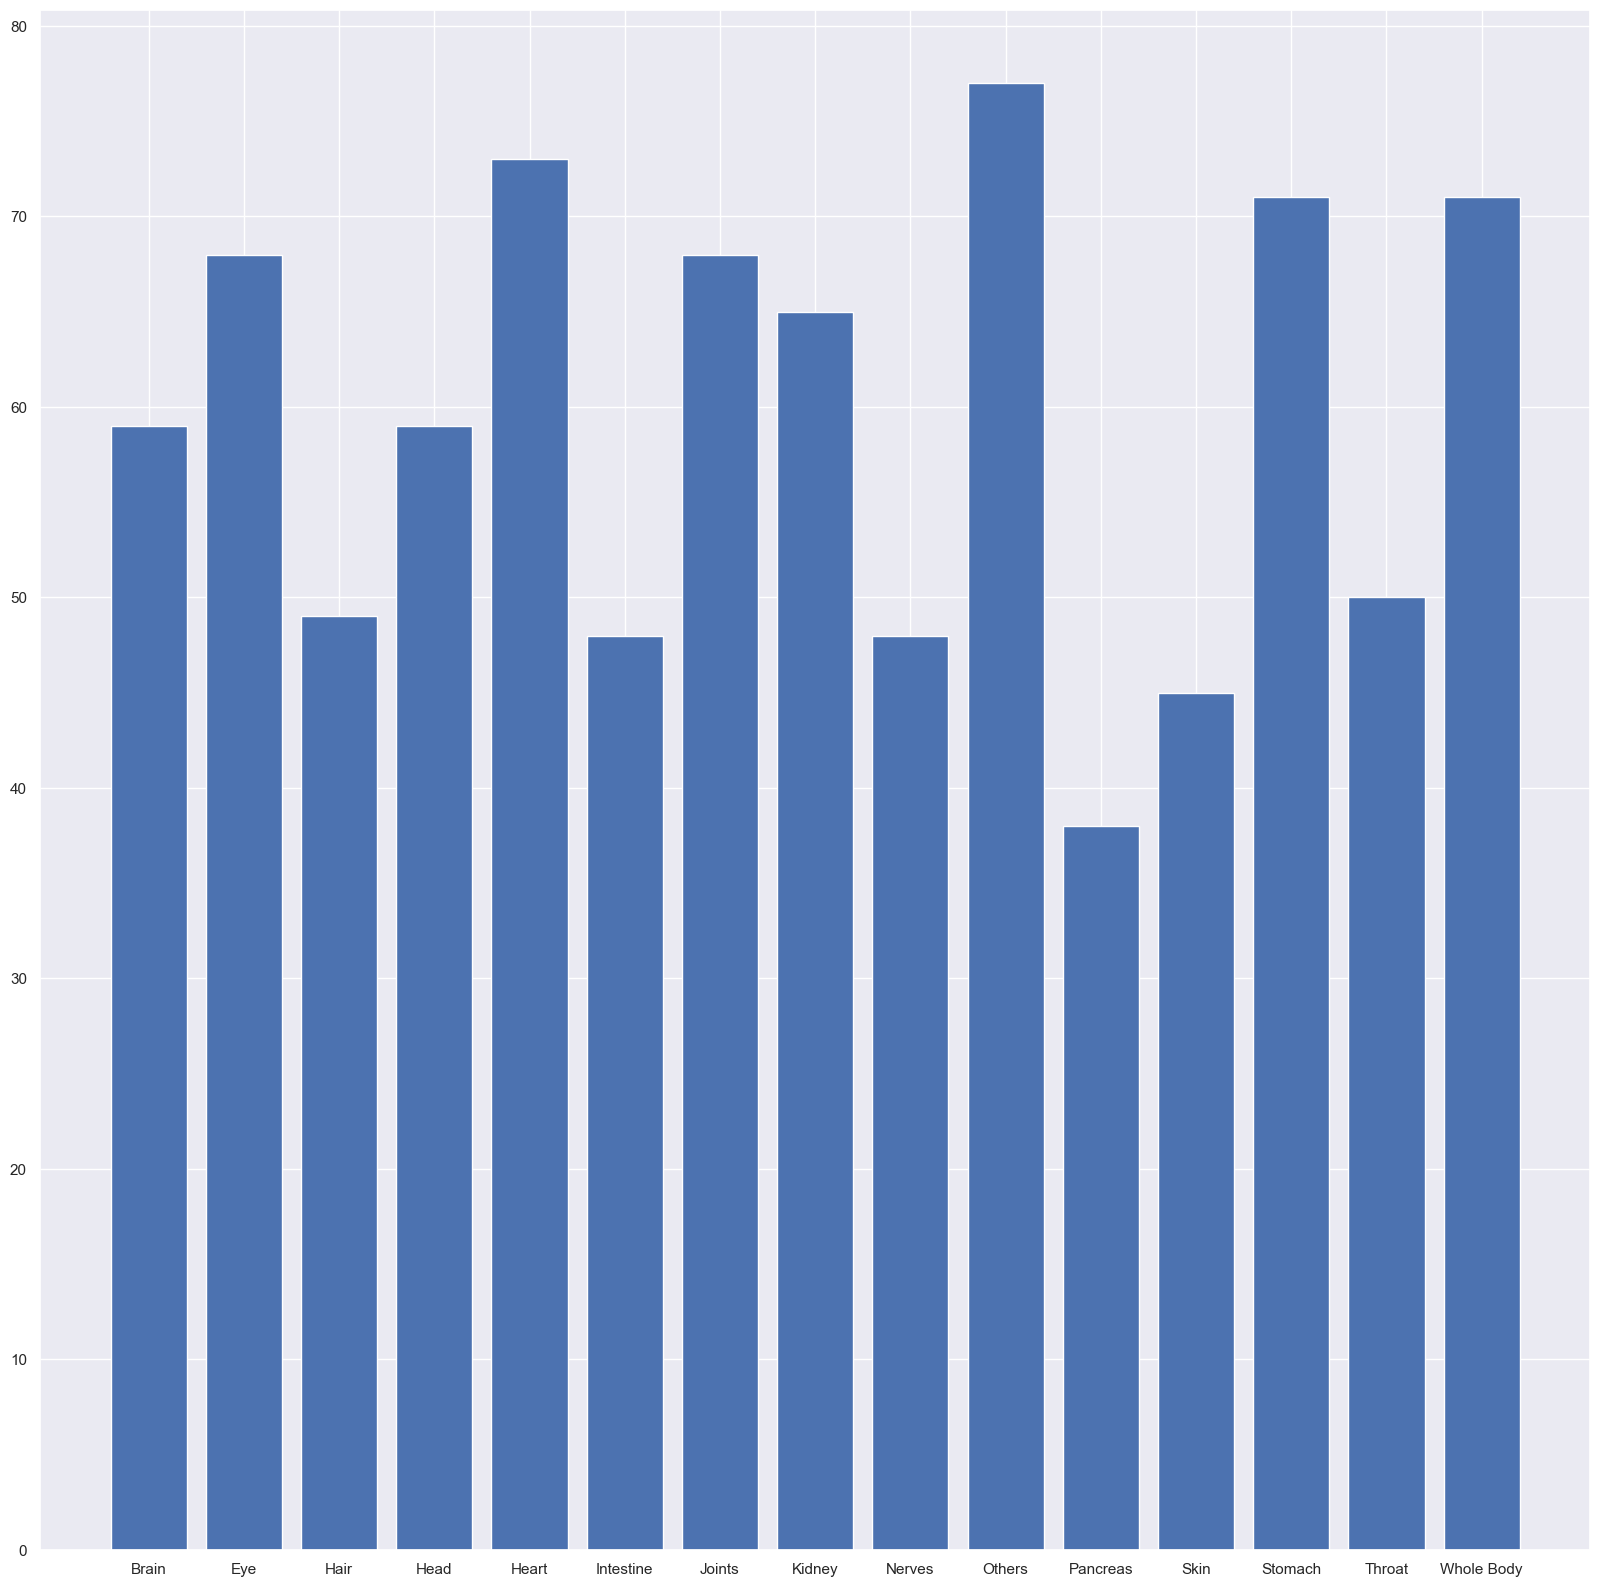

In [173]:
plt.figure(figsize=(20,20))
plt.bar(data_6['key_benefit_areas'], data_6['name'])

In [14]:
# Q8. Most used ingredient
merged_df['key_ingredients'].mode()

0    Belladonna
Name: key_ingredients, dtype: object

In [15]:
merged_df['key_ingredients'].value_counts()

Belladonna                                                                          137
Natrum Muriaticum                                                                   134
Thuja Occidentalis                                                                  130
Bryonia Alba                                                                        123
Ruta Graveolens                                                                     106
                                                                                   ... 
CantharisEupatorium Purp.DulcamaraBerberis Vul.Equisetum Hyemale                      1
AtropinumCalcarea iodataLapis albus                                                   1
Merc vSantonineStannum MetCinchona                                                    1
Cimicifuga recemosaColocynthisKalium CarbonicumNatrum SulphuricumRanunculus bulb      1
Justicia adhatoda 1x.                                                                 1
Name: key_ingredients, Length: 5

In [24]:
# Q9). Which brand has most greater than 4 point review medicine?

merged_df[merged_df['ratings']>4]['brand_names'].value_counts()

SBL Pvt Ltd                                               2272
Bjain Pharmaceuticals Pvt Ltd                             1857
Dr Willmar Schwabe India Pvt Ltd                          1421
Dr Reckeweg & Co                                          1264
Bakson's Homeopathy                                        323
Adel Pekana Germany                                        273
Lord's Homoeopathic Laboratory Pvt Ltd                     138
Allen Homoeo & Herbal Products Ltd                          95
New Life Laboratories Pvt Ltd                               93
Wheezal Homeo Pharma                                        63
Hapro Homeo Chem Pvt Ltd                                    60
LDD Bioscience Pvt Ltd                                      59
Bio-India Pharma Pvt Ltd                                    52
HAPDCO                                                      40
Rxhomeo Private Limited                                     33
Medisynth Chemicals Pvt Ltd                            

In [184]:
merged_df[merged_df['ratings']>4].groupby('brand_names').agg({\
    'name' : 'count'}).sort_values(ascending = False, by = 'name').head(10)

,name
brand_names,
SBL Pvt Ltd,2272
Bjain Pharmaceuticals Pvt Ltd,1857
Dr Willmar Schwabe India Pvt Ltd,1421
Dr Reckeweg & Co,1264
Bakson's Homeopathy,323
Adel Pekana Germany,273
Lord's Homoeopathic Laboratory Pvt Ltd,138
Allen Homoeo & Herbal Products Ltd,95
New Life Laboratories Pvt Ltd,93


In [181]:
data_9 = merged_df[merged_df['ratings']>4].groupby('brand_names').agg({\
    'name' : 'count'}).sort_values(ascending = False, by = 'name').head(10).reset_index()

In [186]:
data_9.rename(columns = {'name' : 'Number of Medicines'}, inplace = True)

In [187]:
data_9

,brand_names,Number of Medicines
0,SBL Pvt Ltd,2272
1,Bjain Pharmaceuticals Pvt Ltd,1857
2,Dr Willmar Schwabe India Pvt Ltd,1421
3,Dr Reckeweg & Co,1264
4,Bakson's Homeopathy,323
5,Adel Pekana Germany,273
6,Lord's Homoeopathic Laboratory Pvt Ltd,138
7,Allen Homoeo & Herbal Products Ltd,95
8,New Life Laboratories Pvt Ltd,93
9,Wheezal Homeo Pharma,63


In [188]:
data_9.to_excel("q9_data.xlsx", index=False)

In [192]:
merged_df.isnull().sum()

name                     0
size_of_bottle           0
MRPs                     0
selling_price            0
1mg_url                  0
brand_names              0
key_ingredients       8094
ratings              31401
number_of_ratings    35012
key_benefit_areas        0
dtype: int64

In [6]:
merged_df.head(1)

,name,size_of_bottle,MRPs,selling_price,1mg_url,brand_names,key_ingredients,ratings,number_of_ratings,key_benefit_areas
0,Dr. Reckeweg R89 Hair Care Drop,bottle of 30 ml Drop,310,279,https://www.1mg.com/otc/dr.-reckeweg-r89-hair-...,Dr Reckeweg & Co,"Hypophysis, Juglans, Kalium phosphoricum, Poly...",4.3,1169.0,Hair


In [8]:
merged_df[merged_df['key_benefit_areas']!="Others"].groupby('key_benefit_areas')['brand_names'].count()

key_benefit_areas
Brain          586
Eye           3451
Hair           771
Head          1067
Heart         1498
Intestine      752
Joints        2790
Kidney         883
Nerves         597
Pancreas       239
Skin          2329
Stomach       1309
Throat        1900
Whole Body    2364
Name: brand_names, dtype: int64

In [10]:
merged_df["brand_names"].nunique()

83